In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellites-and-debris-in-earths-orbit/space_decay.csv


In [2]:
df=pd.read_csv('/kaggle/input/satellites-and-debris-in-earths-orbit/space_decay.csv')
df

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,...,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-29T18:22:04,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3191411,188414015,0 TBA - TO BE ASSIGNED,1 87970U 21285.56271139 +.00354808 +0...,2 87970 99.0098 214.6827 0011899 219.1613 140...
14368,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:06:35,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194430,188550573,0 TBA - TO BE ASSIGNED,1 89171U 21304.27943186 +.00020950 +0...,2 89171 99.0272 141.1159 0055597 76.8926 283...
14369,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194431,188561362,0 TBA - TO BE ASSIGNED,1 T0007U 21304.15669309 -.00000068 0...,2 T0007 31.9916 262.9339 0566728 162.7824 199...
14370,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194431,188561387,0 TBA - TO BE ASSIGNED,1 T0207U 21304.37554955 .00000690 0...,2 T0207 98.6758 348.3068 0058220 187.0288 173...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 

In [4]:
df.describe()

,CCSDS_OMM_VERS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,...,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,LAUNCH_DATE,DECAY_DATE,FILE,GP_ID
count,14372.0,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.0,14372.000000,14372.0,...,14372.000000,1.437200e+04,14372.000000,14372.000000,14372.000000,14372.000000,14333.000000,0.0,1.437200e+04,1.437200e+04
mean,2.0,12.463847,0.067168,74.354208,182.353111,165.977199,191.015595,0.0,39558.160381,999.0,...,0.000049,2.307751e-07,10636.185210,223.521557,5721.060178,2795.040245,2004.507570,NaN,3.194186e+06,1.885638e+08
std,0.0,4.509305,0.181547,29.626780,116.717713,104.461866,109.873807,0.0,7619.846133,0.0,...,0.002391,1.485939e-05,9580.627227,446.517041,13016.299008,7943.045264,13.565227,NaN,3.119117e+03,1.393616e+05
min,2.0,0.051783,0.000005,0.001400,0.020000,0.008200,0.004800,0.0,26741.000000,999.0,...,-0.014873,-4.210300e-05,6542.850000,87.783000,183.393000,73.279000,1961.000000,NaN,3.142499e+06,1.860926e+08
25%,2.0,13.452144,0.000725,53.055300,71.987350,77.363475,90.001600,0.0,33965.750000,999.0,...,0.000001,0.000000e+00,6956.246750,96.232750,599.876000,546.115000,1997.000000,NaN,3.194431e+06,1.885665e+08
50%,2.0,14.277052,0.003416,86.369200,189.460250,150.483900,206.957400,0.0,40165.500000,999.0,...,0.000010,0.000000e+00,7177.549000,100.861000,843.686000,702.433500,2002.000000,NaN,3.194950e+06,1.885986e+08
75%,2.0,14.963745,0.013505,98.565125,292.484750,258.328550,284.163200,0.0,45173.500000,999.0,...,0.000032,0.000000e+00,7468.055000,107.046000,1207.919500,831.959750,2018.000000,NaN,3.195064e+06,1.886107e+08
max,2.0,16.404097,0.897218,144.586200,359.967900,359.989900,359.981900,0.0,270288.000000,999.0,...,0.225321,1.654800e-03,304049.635000,27808.429000,372136.402000,224547.015000,2021.000000,NaN,3.195727e+06,1.886250e+08


In [5]:
df.columns

Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE',
       'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'],
      dtype='object')

**Columns which might be useful to analyze and create new features: LAUNCH DATE , OBJECT_TYPE , RCS_SIZE , COUNTRY_CODE , APOAPSIS , PERIAPSIS , MEAN_ANOMALY , ECCENTRICITY**

In [6]:
df1=df[["LAUNCH_DATE","OBJECT_TYPE","RCS_SIZE","COUNTRY_CODE","APOAPSIS","PERIAPSIS","MEAN_ANOMALY","ECCENTRICITY","SEMIMAJOR_AXIS"]]
df1

,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,SEMIMAJOR_AXIS
0,1992.0,DEBRIS,MEDIUM,FR,27784.871,796.095,38.7796,0.652893,20668.618
1,1979.0,DEBRIS,SMALL,CIS,1002.507,957.299,201.3337,0.003072,7358.038
2,2001.0,PAYLOAD,LARGE,IND,35797.696,33841.738,146.2900,0.023739,41197.852
3,1999.0,DEBRIS,SMALL,PRC,679.465,594.417,323.1632,0.006062,7015.076
4,1999.0,DEBRIS,SMALL,PRC,697.039,609.491,27.6061,0.006226,7031.400
...,...,...,...,...,...,...,...,...,...
14367,NaN,TBA,NaN,NaN,434.844,418.650,140.8771,0.001190,6804.882
14368,NaN,TBA,NaN,NaN,615.599,538.263,283.8489,0.005560,6955.066
14369,NaN,TBA,NaN,NaN,1732.692,862.672,199.2858,0.056673,7675.817
14370,NaN,TBA,NaN,NaN,851.919,768.219,173.0081,0.005822,7188.204


**ADDING A NEW FEATURE : CENTER FOCUS DISTANCE OF PARABOLA which is the multiplication of Eccentricity and the semimajor axis of the orbital object.**

In [7]:
df1['CENT_FOCUS_DIST'] = df['SEMIMAJOR_AXIS']*df['ECCENTRICITY']
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,SEMIMAJOR_AXIS,CENT_FOCUS_DIST
0,1992.0,DEBRIS,MEDIUM,FR,27784.871,796.095,38.7796,0.652893,20668.618,13494.387744
1,1979.0,DEBRIS,SMALL,CIS,1002.507,957.299,201.3337,0.003072,7358.038,22.603893
2,2001.0,PAYLOAD,LARGE,IND,35797.696,33841.738,146.2900,0.023739,41197.852,977.979329
3,1999.0,DEBRIS,SMALL,PRC,679.465,594.417,323.1632,0.006062,7015.076,42.523988
4,1999.0,DEBRIS,SMALL,PRC,697.039,609.491,27.6061,0.006226,7031.400,43.773981
...,...,...,...,...,...,...,...,...,...,...
14367,NaN,TBA,NaN,NaN,434.844,418.650,140.8771,0.001190,6804.882,8.097129
14368,NaN,TBA,NaN,NaN,615.599,538.263,283.8489,0.005560,6955.066,38.668080
14369,NaN,TBA,NaN,NaN,1732.692,862.672,199.2858,0.056673,7675.817,435.010272
14370,NaN,TBA,NaN,NaN,851.919,768.219,173.0081,0.005822,7188.204,41.849652


In [8]:
import math

In [9]:
M=df1["MEAN_ANOMALY"]
e=df1["ECCENTRICITY"]
c=df1["CENT_FOCUS_DIST"]
a=df1["SEMIMAJOR_AXIS"]

In [10]:
df1["CURRENT_YEAR"]=2021
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,SEMIMAJOR_AXIS,CENT_FOCUS_DIST,CURRENT_YEAR
0,1992.0,DEBRIS,MEDIUM,FR,27784.871,796.095,38.7796,0.652893,20668.618,13494.387744,2021
1,1979.0,DEBRIS,SMALL,CIS,1002.507,957.299,201.3337,0.003072,7358.038,22.603893,2021
2,2001.0,PAYLOAD,LARGE,IND,35797.696,33841.738,146.2900,0.023739,41197.852,977.979329,2021
3,1999.0,DEBRIS,SMALL,PRC,679.465,594.417,323.1632,0.006062,7015.076,42.523988,2021
4,1999.0,DEBRIS,SMALL,PRC,697.039,609.491,27.6061,0.006226,7031.400,43.773981,2021
...,...,...,...,...,...,...,...,...,...,...,...
14367,NaN,TBA,NaN,NaN,434.844,418.650,140.8771,0.001190,6804.882,8.097129,2021
14368,NaN,TBA,NaN,NaN,615.599,538.263,283.8489,0.005560,6955.066,38.668080,2021
14369,NaN,TBA,NaN,NaN,1732.692,862.672,199.2858,0.056673,7675.817,435.010272,2021
14370,NaN,TBA,NaN,NaN,851.919,768.219,173.0081,0.005822,7188.204,41.849652,2021


In [11]:
df1.LAUNCH_DATE=df1.LAUNCH_DATE.dropna()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**ADDING ANOTHER FEATURE: OBJECT_AGE**

In [12]:
df1["OBJECT_AGE"]=df1.CURRENT_YEAR-df1.LAUNCH_DATE

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1

,LAUNCH_DATE,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,SEMIMAJOR_AXIS,CENT_FOCUS_DIST,CURRENT_YEAR,OBJECT_AGE
0,1992.0,DEBRIS,MEDIUM,FR,27784.871,796.095,38.7796,0.652893,20668.618,13494.387744,2021,29.0
1,1979.0,DEBRIS,SMALL,CIS,1002.507,957.299,201.3337,0.003072,7358.038,22.603893,2021,42.0
2,2001.0,PAYLOAD,LARGE,IND,35797.696,33841.738,146.2900,0.023739,41197.852,977.979329,2021,20.0
3,1999.0,DEBRIS,SMALL,PRC,679.465,594.417,323.1632,0.006062,7015.076,42.523988,2021,22.0
4,1999.0,DEBRIS,SMALL,PRC,697.039,609.491,27.6061,0.006226,7031.400,43.773981,2021,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14367,NaN,TBA,NaN,NaN,434.844,418.650,140.8771,0.001190,6804.882,8.097129,2021,NaN
14368,NaN,TBA,NaN,NaN,615.599,538.263,283.8489,0.005560,6955.066,38.668080,2021,NaN
14369,NaN,TBA,NaN,NaN,1732.692,862.672,199.2858,0.056673,7675.817,435.010272,2021,NaN
14370,NaN,TBA,NaN,NaN,851.919,768.219,173.0081,0.005822,7188.204,41.849652,2021,NaN


# HYPOTHESIS TESTING

***(ASSUMPTION THROUGHOUT: IS NORMALLY DISTRIBUTED)***

**CHECKING IF THE FEATURE RCS_SIZE IS NORMALLY DISTRIBUTED**

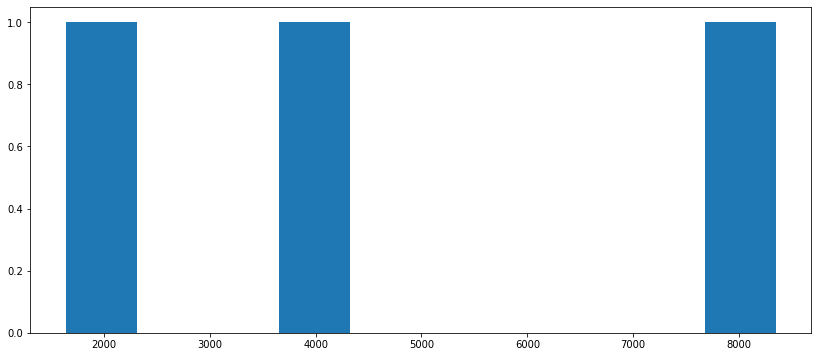

In [14]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
df2=df1.RCS_SIZE.value_counts()
pyplot.hist(df2)
pyplot.show()

In [15]:
from scipy.stats import shapiro
DataToTest=df2
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.20f' %(stat,p))

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.98, p=0.73746836185455322266
Normal distribution


**NOW, LET'S CHECK IF THE FEATURE COUNTRY_CODE IS NORMALLY DISTRIBUTED**

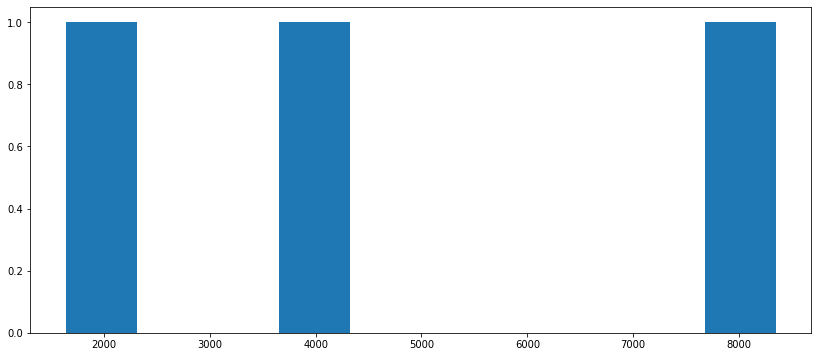

In [16]:
%matplotlib inline
pyplot.figure(figsize=(14,6))
df3=df1.COUNTRY_CODE.value_counts()
pyplot.hist(df2)
pyplot.show()

In [17]:
from scipy.stats import shapiro
DataToTest=df3
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.20f' %(stat,p))

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.20, p=0.00000000000000000001
Not a Normal distribution


In [18]:
from numpy.random import randn
DataToTest2=randn(100)
DataToTest2

array([ 7.49946652e-01,  1.23965595e+00,  1.16698743e+00, -1.73873891e+00,
        5.74016338e-01, -2.05285664e-02,  1.15063379e+00,  3.37865058e-01,
       -1.52573412e+00,  5.73392024e-01,  1.93073839e-01, -1.46879265e+00,
        4.98670011e-01, -9.33552085e-01,  9.33523436e-01, -8.20629455e-01,
       -1.44162245e-01,  6.04258088e-01,  1.99568065e-01,  7.47855516e-01,
       -7.66599565e-01, -9.28344824e-01,  1.94503569e+00, -6.55796146e-01,
        7.14481799e-01, -1.02997185e+00,  8.18352443e-01,  3.56726480e-01,
       -1.37126055e-01,  4.99901781e-01,  7.06410013e-01, -8.45448912e-01,
        6.80749463e-02,  5.65525853e-01, -5.11346498e-01, -4.33954044e-01,
        2.12505189e-01,  8.28042497e-01,  1.25957201e+00,  8.62923166e-02,
        1.90237927e-02,  1.49105312e+00,  2.18546550e+00,  1.28465519e+00,
       -1.77182090e+00,  9.27396572e-02, -1.68569934e-01,  1.10555200e-01,
       -6.90743983e-01,  1.09774162e+00, -1.65239167e+00, -8.32249040e-01,
       -7.35181964e-01,  

In [19]:
from scipy.stats import shapiro
stat, p = shapiro(DataToTest2)
print('stat=%.2f, p=%.20f' %(stat,p))

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.98, p=0.06869703531265258789
Normal distribution


# K^2 NORMALITY TEST ON THE FEATURES RCS_SIZE and OBJECT_TYPE

In [20]:
from scipy.stats import normaltest
DataToTest=df2
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.20f' %(stat,p))

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.98, p=0.73746836185455322266
Normal distribution


In [21]:
df3=df1['OBJECT_TYPE'].value_counts()
from scipy.stats import normaltest
DataToTest=df3
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.20f' %(stat,p))

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.90, p=0.41902008652687072754
Normal distribution


# CORRELATION TEST : PEARSON AND SPEARMAN'S RANK CORRELATION

**TAKING SAMPLES OF THE FEATURES RCS_SIZE AND OBJECT AGE**

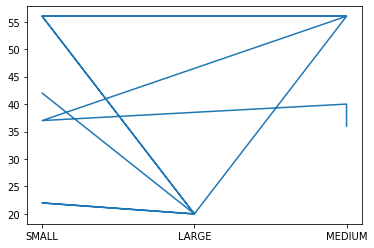

In [22]:
from matplotlib import pyplot
test1=df1[1:20]['RCS_SIZE']
test2=df1[1:20]['OBJECT_AGE']
test3=df1['COUNTRY_CODE']
pyplot.plot(test1 , test2)
pyplot.show()

**SPEARMAN'S RANK CORRELATION**

In [23]:
from scipy.stats import spearmanr
stat, p = spearmanr(test1, test2)
print('stat=%.2f, p=%.5f' %(stat,p))

if p>0.05:
    print('Independent samples')
else:
    print('dependent samples')

stat=0.47, p=0.04032
dependent samples


In [24]:
df1.corr(method='pearson')

,LAUNCH_DATE,APOAPSIS,PERIAPSIS,MEAN_ANOMALY,ECCENTRICITY,SEMIMAJOR_AXIS,CENT_FOCUS_DIST,CURRENT_YEAR,OBJECT_AGE
LAUNCH_DATE,1.000000,0.073964,0.086482,0.130060,0.011581,0.086092,0.027861,NaN,-1.000000
APOAPSIS,0.073964,1.000000,0.651121,-0.061499,0.653662,0.949217,0.792898,NaN,-0.073964
PERIAPSIS,0.086482,0.651121,1.000000,-0.026702,-0.032831,0.856846,0.053788,NaN,-0.086482
MEAN_ANOMALY,0.130060,-0.061499,-0.026702,1.000000,-0.061775,-0.052845,-0.059474,NaN,-0.130060
ECCENTRICITY,0.011581,0.653662,-0.032831,-0.061775,1.000000,0.430425,0.886358,NaN,-0.011581
SEMIMAJOR_AXIS,0.086092,0.949217,0.856846,-0.052845,0.430425,1.000000,0.560915,NaN,-0.086092
CENT_FOCUS_DIST,0.027861,0.792898,0.053788,-0.059474,0.886358,0.560915,1.000000,NaN,-0.027861
CURRENT_YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OBJECT_AGE,-1.000000,-0.073964,-0.086482,-0.130060,-0.011581,-0.086092,-0.027861,NaN,1.000000


# CHI2 CATEGORICAL TEST

In [25]:
contingency_data=pd.crosstab(df1['RCS_SIZE'],df1['OBJECT_AGE'],margins=False)
contingency_data

OBJECT_AGE,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
RCS_SIZE,,,,,,,,,,,,,,,,,,,,,
LARGE,1062,960,221,206,155,117,125,141,131,120,...,0,0,2,0,0,0,0,0,0,0
MEDIUM,330,142,105,105,39,37,29,61,28,48,...,1,0,8,0,0,12,0,1,0,3
SMALL,187,96,138,190,231,53,44,90,65,31,...,65,3,45,5,60,132,8,4,2,21


In [26]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' %(stat,p))

if p>0.05:
    print('Independent categories')
else:
    print('dependent categories')

stat=9128.883, p=0.000
dependent categories


***HENCE, We got to know that the size of the object and it's age are two dependable categories***

In [27]:
contingency_data2=pd.crosstab(df1['COUNTRY_CODE'],df1['OBJECT_AGE'],margins=False)
contingency_data2

OBJECT_AGE,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
COUNTRY_CODE,,,,,,,,,,,,,,,,,,,,,
AB,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC,0,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
AGO,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALG,0,0,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARGN,5,14,0,3,1,3,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
URY,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
US,1054,887,190,296,255,53,28,107,35,14,...,65,14,57,5,60,144,8,5,2,24
USBZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' %(stat,p))

if p>0.05:
    print('Independent categories')
else:
    print('dependent categories')

stat=9128.883, p=0.000
dependent categories


***Hence, the object age and the country to which it belongs are also two dependent categories.***

# WILL BE UPDATING THE CODE WITH NEW TESTS AND FEATURES SOON.
# THANK YOU!